# Motivation

## SKlearn toy dataset


In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

X, y = load_iris(return_X_y=True)
print(type(X), X.shape)
print(type(y), y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)
print(type(X_train), X_train.shape)

model = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
print(model.score(X_test, y_test))



<class 'numpy.ndarray'> (150, 4)
<class 'numpy.ndarray'> (150,)
<class 'numpy.ndarray'> (112, 4)
1.0


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


## MINIST

In [4]:
import torch
from torchvision import datasets, transforms

transform = transforms.ToTensor()
train_dataset_full = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 481kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.44MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.02MB/s]


Danh sách nhãn: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]
--debug----
<class 'torch.Tensor'> torch.Size([1, 28, 28])
--debug----


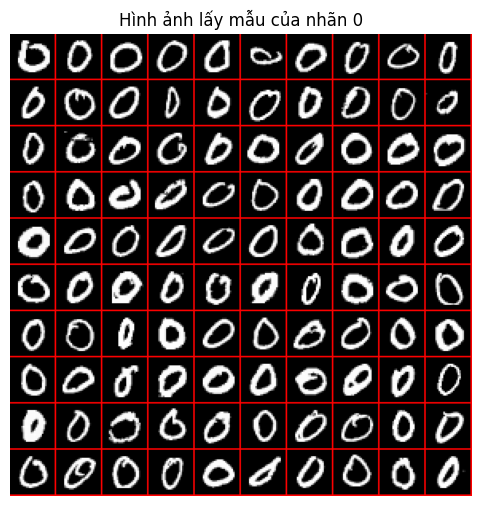

--debug----
<class 'torch.Tensor'> torch.Size([1, 28, 28])
--debug----


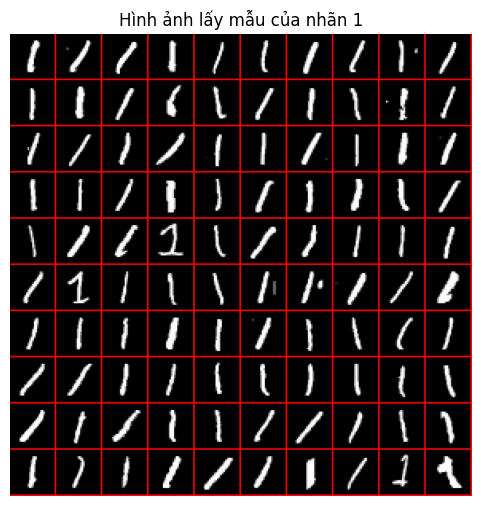

--debug----
<class 'torch.Tensor'> torch.Size([1, 28, 28])
--debug----


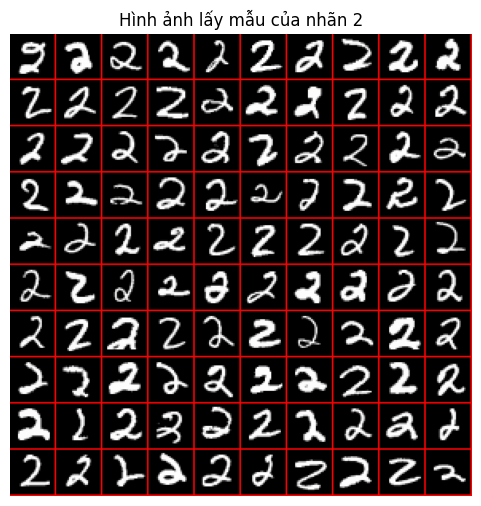

--debug----
<class 'torch.Tensor'> torch.Size([1, 28, 28])
--debug----


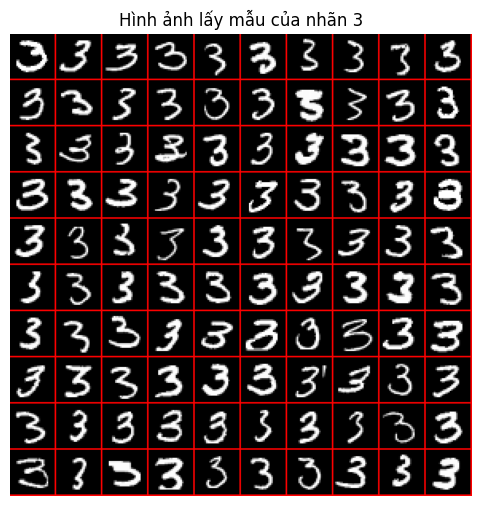

--debug----
<class 'torch.Tensor'> torch.Size([1, 28, 28])
--debug----


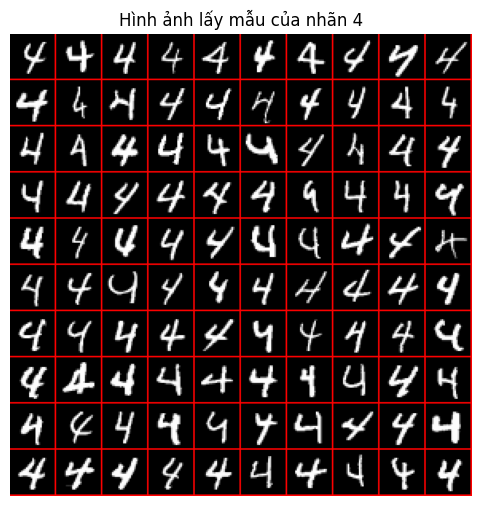

--debug----
<class 'torch.Tensor'> torch.Size([1, 28, 28])
--debug----


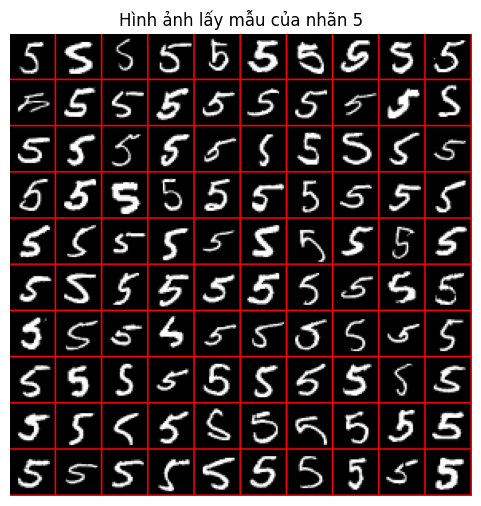

--debug----
<class 'torch.Tensor'> torch.Size([1, 28, 28])
--debug----


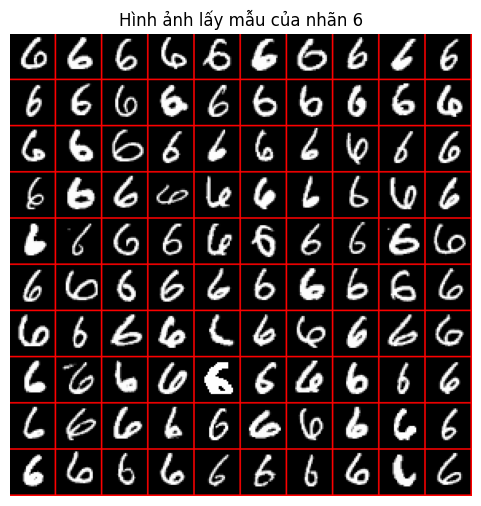

--debug----
<class 'torch.Tensor'> torch.Size([1, 28, 28])
--debug----


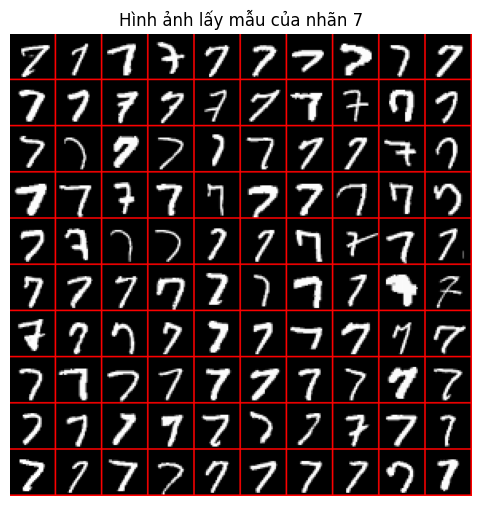

--debug----
<class 'torch.Tensor'> torch.Size([1, 28, 28])
--debug----


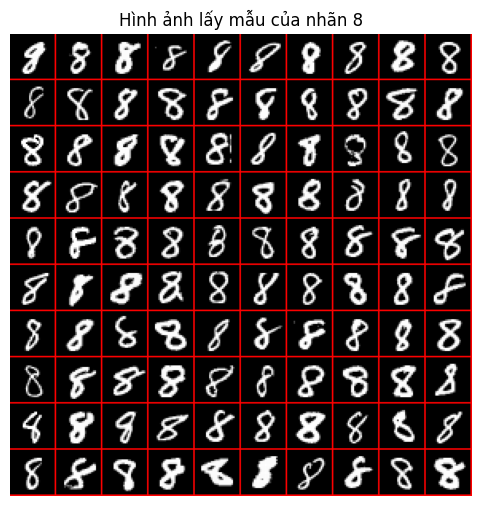

--debug----
<class 'torch.Tensor'> torch.Size([1, 28, 28])
--debug----


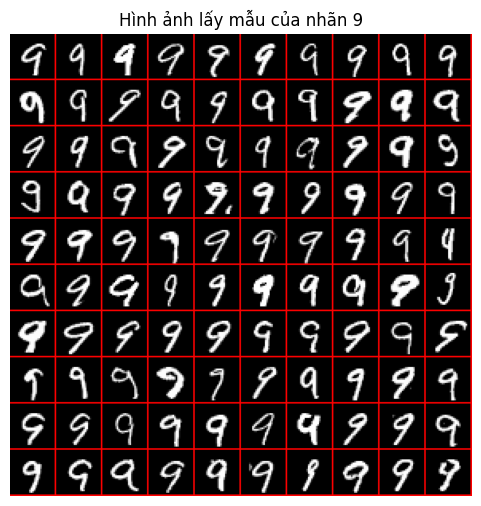

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw
import random
import torchvision.transforms.functional as TF

# Chuyển ảnh từ xám sang RGB
def to_rgb(tensor_img):
    return TF.to_pil_image(tensor_img.repeat(3, 1, 1))  # (1, 28, 28) -> (3, 28, 28)

# Tạo ảnh 10x10 (100 ảnh) với đường viền 1px màu đỏ
def make_grid_image(images, border=1):
    size = 28 + border
    grid_img = Image.new('RGB', (size*10, size*10), (255, 255, 255))
    for i in range(10):
        for j in range(10):
            img = to_rgb(images[i * 10 + j])
            canvas = Image.new('RGB', (size, size), (255, 0, 0))
            canvas.paste(img, (border//2, border//2))
            grid_img.paste(canvas, (j*size, i*size))
    return grid_img

# In danh sách nhãn
labels_list = list(set(train_dataset_full.targets.numpy()))
labels_list.sort()
print("Danh sách nhãn:", labels_list)

# Hiển thị ảnh ghép cho mỗi nhãn
for label in labels_list:
    indices = (train_dataset_full.targets == label).nonzero(as_tuple=True)[0]
    sampled = torch.utils.data.Subset(train_dataset_full, indices.tolist())
    selected_imgs = [sampled[i][0] for i in random.sample(range(len(sampled)), 100)]
    print("--debug----")
    print(type(selected_imgs[0]), selected_imgs[0].shape)

    print("--debug----")
    grid_img = make_grid_image(selected_imgs)
    plt.figure(figsize=(6,6))
    plt.imshow(grid_img)
    plt.axis('off')
    plt.title(f"Hình ảnh lấy mẫu của nhãn {label}")
    plt.show()

# Numpy - Basics


## Creation

In [10]:
x = np.array([1, 2, 3])
print(x)

[1 2 3]


In [12]:
type(x)

numpy.ndarray

In [15]:
x

array([1, 2, 3])

In [13]:
X = np.array([
    [0, 1, 5],
    [3, 2, 1]
])

In [14]:
X

array([[0, 1, 5],
       [3, 2, 1]])

In [16]:
X.shape

(2, 3)

In [19]:
X.shape[0]

2

In [17]:
X.ndim

2

In [18]:
X.dtype

dtype('int64')

## Random

### Uniform

In [20]:
a = np.random.uniform(0, 10, (5, ))
a

array([9.01744946, 0.80204225, 7.95377752, 4.39261647, 0.99399545])

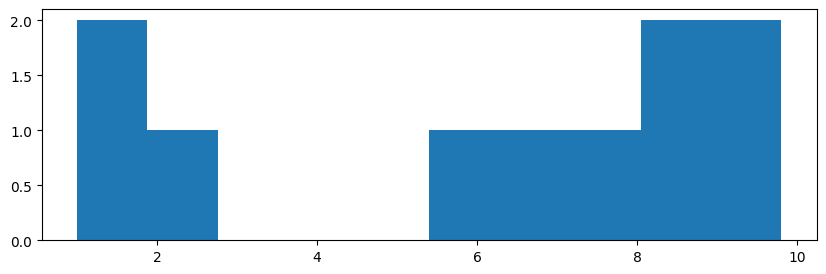

In [31]:
left, right = 0, 10
N = 10;
a = np.random.uniform(left, right, (N, ))

plt.figure(figsize=(10, 3))
plt.hist(a, bins=10)
plt.show()

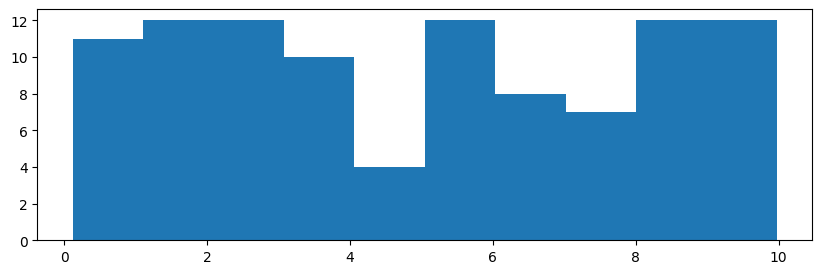

In [32]:
left, right = 0, 10
N = 100;
a = np.random.uniform(left, right, (N, ))

plt.figure(figsize=(10, 3))
plt.hist(a, bins=10)
plt.show()

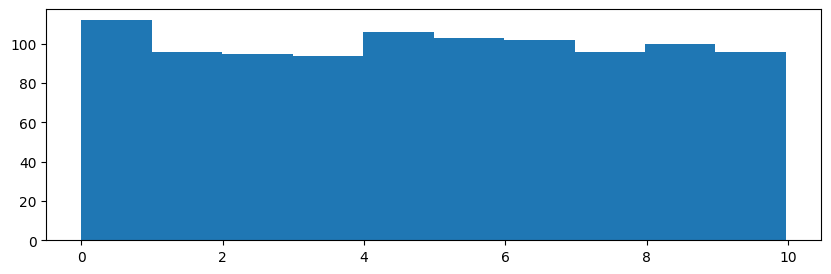

In [33]:
left, right = 0, 10
N = 1000;
a = np.random.uniform(left, right, (N, ))

plt.figure(figsize=(10, 3))
plt.hist(a, bins=10)
plt.show()

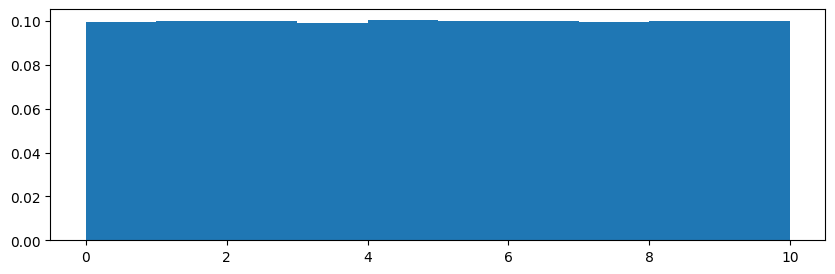

In [35]:
left, right = 0, 10
N = 1000000;
a = np.random.uniform(left, right, (N, ))

plt.figure(figsize=(10, 3))
plt.hist(a, bins=10, density=True)
plt.show()

### Normal

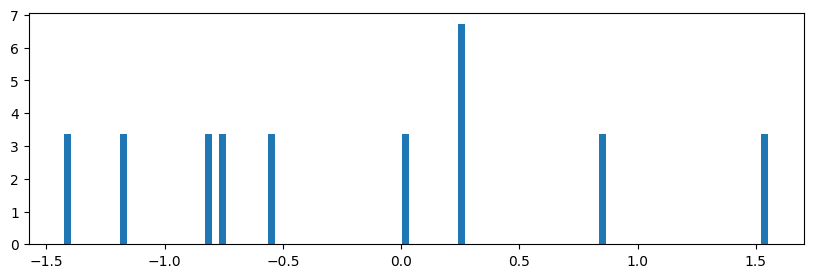

est_mu=-0.1772078399898595, est_sigma=0.8882183943431674


In [40]:
mu, sigma = 0, 1
N = 10
a = np.random.normal(mu, sigma, (N, ))


plt.figure(figsize=(10, 3))
plt.hist(a, bins=100, density=True)
plt.show()

est_mu, est_sigma = np.mean(a), np.std(a)
print(f"est_mu={est_mu}, est_sigma={est_sigma}")

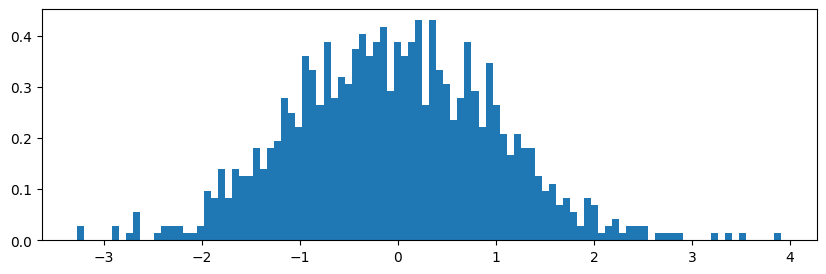

est_mu=-0.04290592668488351, est_sigma=1.0289591331024803


In [41]:
mu, sigma = 0, 1
N = 1000
a = np.random.normal(mu, sigma, (N, ))


plt.figure(figsize=(10, 3))
plt.hist(a, bins=100, density=True)
plt.show()

est_mu, est_sigma = np.mean(a), np.std(a)
print(f"est_mu={est_mu}, est_sigma={est_sigma}")

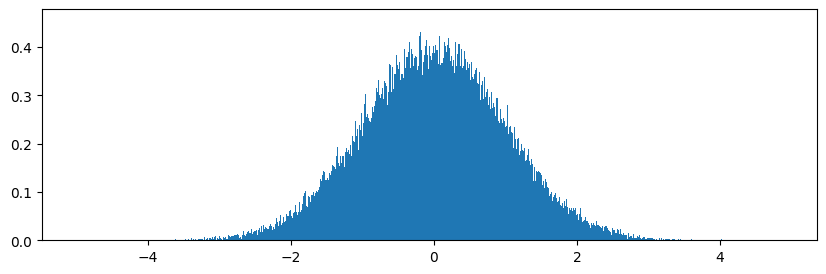

est_mu=0.0007697623476879401, est_sigma=1.0008958562805217


In [43]:
mu, sigma = 0, 1
N = 1000000
a = np.random.normal(mu, sigma, (N, ))


plt.figure(figsize=(10, 3))
plt.hist(a, bins=10000, density=True)
plt.show()

est_mu, est_sigma = np.mean(a), np.std(a)
print(f"est_mu={est_mu}, est_sigma={est_sigma}")

### Categorical

In [46]:
import pandas as pd

probs = [0.6, 0.3, 0.1]
names = ["Chicken", "Dog", "Horse"]
N = 10
values = np.random.choice(names, (N, ), p=probs)
s = pd.Series(values)
s = s.value_counts()/s.value_counts().sum()
s


,count
Chicken,0.8
Dog,0.2


In [47]:
import pandas as pd

probs = [0.6, 0.3, 0.1]
names = ["Chicken", "Dog", "Horse"]
N = 1000
values = np.random.choice(names, (N, ), p=probs)
s = pd.Series(values)
s = s.value_counts()/s.value_counts().sum()
s


,count
Chicken,0.585
Dog,0.299
Horse,0.116


In [48]:
import pandas as pd

probs = [0.6, 0.3, 0.1]
names = ["Chicken", "Dog", "Horse"]
N = 10000
values = np.random.choice(names, (N, ), p=probs)
s = pd.Series(values)
s = s.value_counts()/s.value_counts().sum()
s


,count
Chicken,0.5966
Dog,0.2987
Horse,0.1047


### Multinomial

In [27]:
probs = [0.5, 0.2, 0.3]
X = np.random.multinomial(20, probs, size=5)
X

array([[ 9,  7,  4],
       [11,  2,  7],
       [ 9,  5,  6],
       [ 8,  3,  9],
       [11,  4,  5]])

In [28]:
X.shape

(5, 3)

In [29]:
X.sum(axis=-1)

array([20, 20, 20, 20, 20])

## Special

In [50]:
x = np.ones(5)
x

array([1., 1., 1., 1., 1.])

In [51]:
X = np.ones((2,3))
X

array([[1., 1., 1.],
       [1., 1., 1.]])

In [52]:
X = np.zeros((2,3))
X

array([[0., 0., 0.],
       [0., 0., 0.]])

In [54]:
X = np.eye(3)
X

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [56]:
class_names = ["Cat", "Chicken", "Dog"]
print("image: class = Cat") # label: text
print("image: class = 0") # label: index
print("image: class=[1.0, 0., 0.]") # label: one-hot = hard-label (distribution)
print("image: class=[0.8, 0., 0.2]") # label: soft-label (distribution)


'image: class = Cat'

In [60]:
from sklearn.preprocessing import LabelEncoder

class_names = ["Cat", "Chicken", "Dog"]
lbencoder = LabelEncoder()
lbencoder.fit(class_names)
print(lbencoder.classes_)

class_list = ["Cat", "Cat", "Chicken", "Dog", "Chicken", "Cat", "Dog"]
class_index = lbencoder.transform(class_list)
print(class_index)
ind_list = [0, 1, 1, 0, 1, 2, 2, 0]
class_list = lbencoder.inverse_transform(ind_list)
print(class_list)

['Cat' 'Chicken' 'Dog']
[0 0 1 2 1 0 2]
['Cat' 'Chicken' 'Chicken' 'Cat' 'Chicken' 'Dog' 'Dog' 'Cat']


In [65]:
# input:
class_list = ["Cat", "Cat", "Chicken", "Dog", "Chicken", "Cat", "Dog"]

# generate list of indices
class_index = lbencoder.transform(class_list)
print(class_index)

# generat one-hot labels
nclasses = len(lbencoder.classes_)
LK = np.eye(nclasses)
LK[class_index]


[0 0 1 2 1 0 2]


array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

## arange / linspace

### arange -> indices

In [68]:
idx = np.arange(10)
print(idx.dtype)
idx

int64


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [69]:
t = [0, 1, 1, 2]
X = np.random.randint(0, 10, (4, 3))
X

array([[9, 3, 6],
       [6, 7, 4],
       [9, 0, 5],
       [3, 2, 8]])

In [75]:
r = np.arange(X.shape[0])

In [76]:
X[r, t]

array([9, 7, 0, 8])

### arange => sampling

In [77]:
np.arange(0, 10, 0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

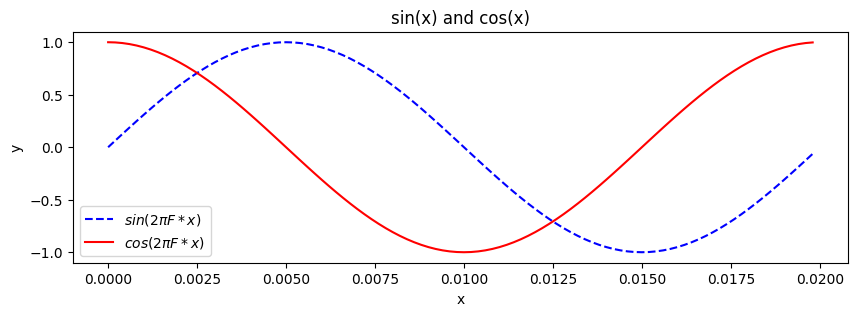

In [86]:
#plot sin
F = 50
T = 1/F
x = np.arange(0, T, T/100)
ysin = np.sin(2*np.pi*F*x)
ycos = np.cos(2*np.pi*F*x)

plt.figure(figsize=(10, 3))
plt.plot(x, ysin, "--b", label="$sin(2\\pi F*x)$")
plt.plot(x, ycos, "-r", label="$cos(2\\pi F*x)$")
plt.xlabel("x")
plt.ylabel("y")
plt.title("sin(x) and cos(x)")
plt.legend()
plt.show()

### linspace -> sampling

In [87]:
np.linspace(0, 10, 5)

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

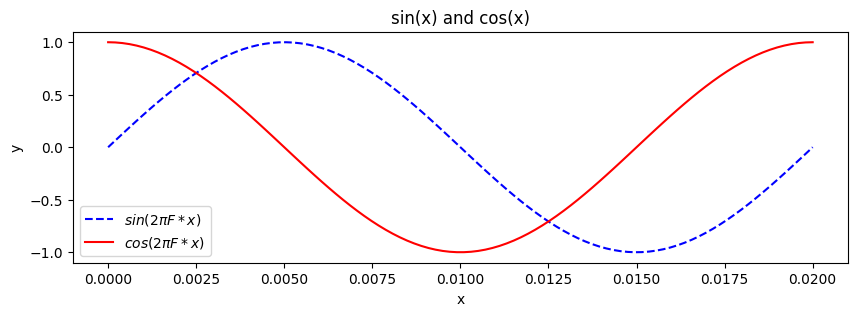

In [88]:
#plot sin
F = 50
T = 1/F
x = np.linspace(0, T, 100)
ysin = np.sin(2*np.pi*F*x)
ycos = np.cos(2*np.pi*F*x)

plt.figure(figsize=(10, 3))
plt.plot(x, ysin, "--b", label="$sin(2\\pi F*x)$")
plt.plot(x, ycos, "-r", label="$cos(2\\pi F*x)$")
plt.xlabel("x")
plt.ylabel("y")
plt.title("sin(x) and cos(x)")
plt.legend()
plt.show()

## reshape

In [94]:
X = np.arange(3*4).reshape(3,4)
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [97]:
X = np.arange(3*4).reshape(3,-1)
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [98]:
X = np.arange(3*4).reshape(-1,4)
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

### Dataset


In [99]:
!gdown --id 1Do8SXKm4rmXW-phHlejV-udLfhSyYgKk

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1Do8SXKm4rmXW-phHlejV-udLfhSyYgKk
From (redirected): https://drive.google.com/uc?id=1Do8SXKm4rmXW-phHlejV-udLfhSyYgKk&confirm=t&uuid=a3998514-59c8-4129-a84e-817c655acfe5
To: /content/animals10small.zip
100% 46.3M/46.3M [00:00<00:00, 62.8MB/s]


In [100]:
!unzip -q animals10small.zip

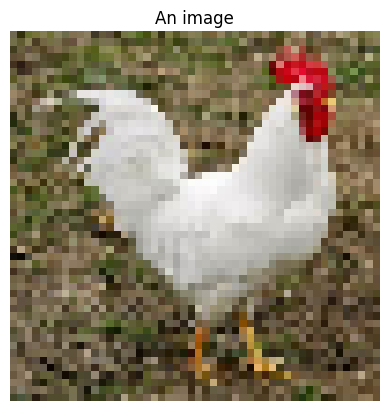

In [107]:
import os
import cv2

def show_image(image, title="An image"):
  plt.figure()
  if image.ndim == 2:
    plt.imshow(image, cmap="gray")
  elif image.ndim == 3:
    plt.imshow(image)
  else:
    raise Exception("Invalid image dimension")

  plt.axis("off")
  plt.title(title)
  plt.show()

path = "animals10small/data"
files = ["chicken/10.jpeg",
         "chicken/100.jpeg",
         "cat/1.jpeg",
         "cat/10.jpeg"]
fnames = [os.path.join(path, fn) for fn in files]
rgb = [cv2.imread(fn, 1) for fn in fnames]
rgb = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in rgb]
rgb = [cv2.resize(im, (50, 50)) for im in rgb]

show_image(rgb[0])

In [108]:
image = rgb[0]
image.shape

(50, 50, 3)

In [109]:
r, g, b = image[:,:,0], image[:,:,1], image[:,:,2]
print(r.shape)
print(g.shape)
print(b.shape)

(50, 50)
(50, 50)
(50, 50)


In [111]:
data = np.concatenate((r.ravel(), g.ravel(), b.ravel()))
data.shape

(7500,)

In [113]:
r.ravel().shape

(2500,)

In [114]:
im = data.reshape(50, 50, -1)
im.shape

(50, 50, 3)

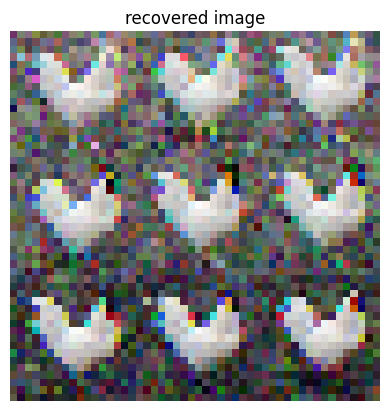

In [115]:
show_image(im, "recovered image")

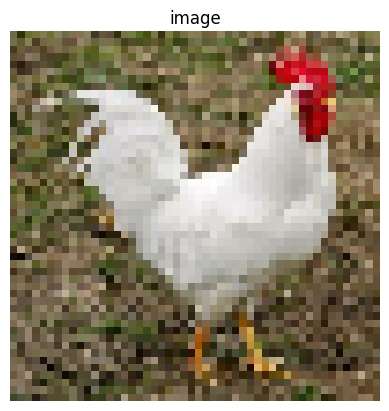

In [120]:
image = data.reshape(3, 50, -1)
image = image.transpose(1, 2, 0)
show_image(image, "image")


In [122]:
X = np.arange(3*4)
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [121]:
X = np.arange(3*4).reshape(3, -1)
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [124]:
X = np.arange(2*3*4)
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [125]:
X = np.arange(2*3*4).reshape(2,3, -1)
X

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [127]:
X = np.arange(2*3*4*5).reshape(2,3, 4, -1)
X


array([[[[  0,   1,   2,   3,   4],
         [  5,   6,   7,   8,   9],
         [ 10,  11,  12,  13,  14],
         [ 15,  16,  17,  18,  19]],

        [[ 20,  21,  22,  23,  24],
         [ 25,  26,  27,  28,  29],
         [ 30,  31,  32,  33,  34],
         [ 35,  36,  37,  38,  39]],

        [[ 40,  41,  42,  43,  44],
         [ 45,  46,  47,  48,  49],
         [ 50,  51,  52,  53,  54],
         [ 55,  56,  57,  58,  59]]],


       [[[ 60,  61,  62,  63,  64],
         [ 65,  66,  67,  68,  69],
         [ 70,  71,  72,  73,  74],
         [ 75,  76,  77,  78,  79]],

        [[ 80,  81,  82,  83,  84],
         [ 85,  86,  87,  88,  89],
         [ 90,  91,  92,  93,  94],
         [ 95,  96,  97,  98,  99]],

        [[100, 101, 102, 103, 104],
         [105, 106, 107, 108, 109],
         [110, 111, 112, 113, 114],
         [115, 116, 117, 118, 119]]]])

In [132]:
type(rgb)

list

In [134]:
len(rgb)
rgb[0].shape

(50, 50, 3)

In [142]:
batch = [np.expand_dims(im, 0) for im in rgb]
batch = np.concatenate(batch, axis=0)
batch.shape

(4, 50, 50, 3)

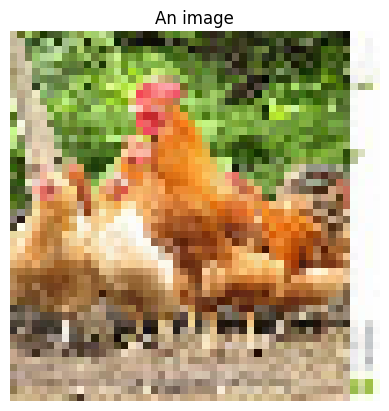

In [147]:
show_image(batch[1])